In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import keras 
from keras.models import Sequential
from keras.layers import Dense, Activation
from data_utils import *
from keras.models import Model, load_model
from matplotlib import pyplot
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
from cifar10_solver import *
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler
import tensorflow as tf    
tf.set_random_seed(1234)
from keras import backend as k
import os
from numpy.random import seed
seed(1)
%load_ext autoreload
%autoreload 2
from ResNet import ResNet18
from keras import losses
from keras import optimizers

Using TensorFlow backend.


In [3]:
# get data
cifar10_data = CIFAR10Data()
x_train, y_train, x_test, y_test = cifar10_data.get_data(subtract_mean=True)

num_train = int(x_train.shape[0] * 0.8)
num_val = x_train.shape[0] - num_train
mask = list(range(num_train, num_train+num_val))
x_val = x_train[mask]
y_val = y_train[mask]

mask = list(range(num_train))
x_train = x_train[mask]
y_train = y_train[mask]

data = (x_train, y_train, x_val, y_val, x_test, y_test)

CIFAR10 Training data shape: (50000, 32, 32, 3)
CIFAR10 Training label shape (50000, 1)
CIFAR10 Test data shape (10000, 32, 32, 3)
CIFAR10 Test label shape (10000, 1)


In [4]:
weight_decay = 1e-4
lr = 1e-1
num_classes = 10
resnet18 = ResNet18(input_shape=(32, 32, 3), classes=num_classes, weight_decay=weight_decay)
opt = optimizers.SGD(lr=lr, momentum=0.9, nesterov=False)
resnet18.compile(optimizer=opt,
                 loss=losses.categorical_crossentropy,
                 metrics=['accuracy'])
resnet18.summary()

Model: "ResNet18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 64)   1728        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 64)   256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 32, 32, 64)   0           batch_normalization_1[0][0]      
___________________________________________________________________________________________

In [5]:
def lr_scheduler(epoch):
    new_lr = lr * (0.1 ** (epoch // 50))
    print('new lr:%.2e' % new_lr)
    return new_lr 

reduce_lr = LearningRateScheduler(lr_scheduler)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
#                               patience=10, min_lr=1e-6, verbose=1)

solver = CIFAR10Solver(resnet18, data)
history = solver.train(epochs=200, batch_size=128, data_augmentation=True, callbacks=[reduce_lr])

train with data augmentation
Epoch 1/200
new lr:1.00e-01
313/313 [==============================] - 97s 310ms/step - loss: 2.7887 - accuracy: 0.2369 - val_loss: 2.5416 - val_accuracy: 0.2553
Epoch 2/200
new lr:1.00e-01
313/313 [==============================] - 85s 272ms/step - loss: 2.2426 - accuracy: 0.3414 - val_loss: 2.3119 - val_accuracy: 0.3219
Epoch 3/200
new lr:1.00e-01
313/313 [==============================] - 85s 273ms/step - loss: 2.0795 - accuracy: 0.3941 - val_loss: 2.0343 - val_accuracy: 0.4105
Epoch 4/200
new lr:1.00e-01
313/313 [==============================] - 85s 272ms/step - loss: 1.9277 - accuracy: 0.4383 - val_loss: 2.2309 - val_accuracy: 0.3646
Epoch 5/200
new lr:1.00e-01
313/313 [==============================] - 85s 272ms/step - loss: 1.7702 - accuracy: 0.4920 - val_loss: 1.9744 - val_accuracy: 0.4344
Epoch 6/200
new lr:1.00e-01
313/313 [==============================] - 85s 272ms/step - loss: 1.6232 - accuracy: 0.5365 - val_loss: 2.3844 - val_accuracy: 0.3461

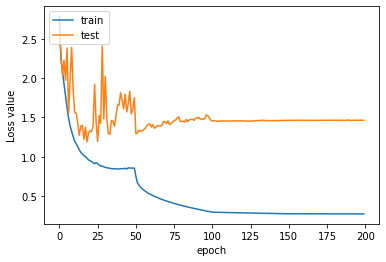

10000/10000 [==============================] - 8s 814us/step
test data loss:1.48 acc:0.7825


In [6]:
from cifar10_solver import *
# plot loss and acc 
plot_history(history)
solver.test()

In [0]:
resnet18.save("ResNet18-CIFAR10-Gaussian-Filter-2.h5")

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [0]:
model = resnet18

1 conv2d_1 (3, 3, 3, 64)


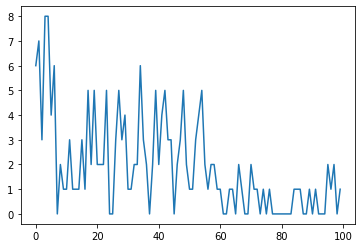

2 conv2d_2 (3, 3, 64, 64)


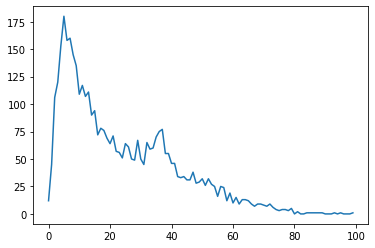

3 conv2d_3 (3, 3, 64, 64)


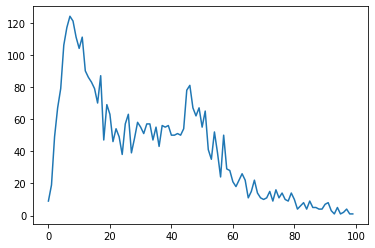

4 conv2d_4 (3, 3, 64, 64)


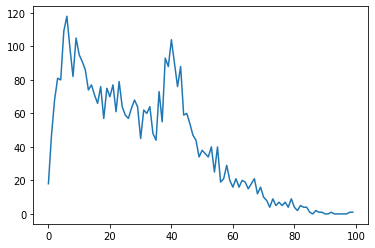

5 conv2d_5 (3, 3, 64, 64)


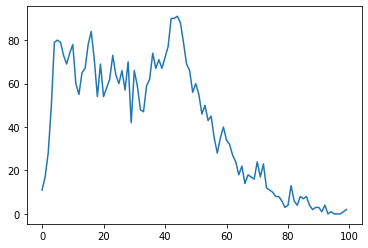

6 conv2d_7 (3, 3, 64, 128)


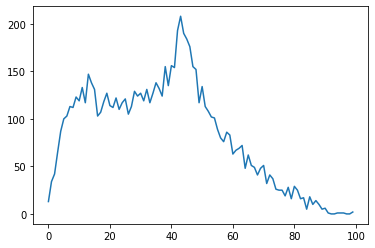

7 conv2d_8 (3, 3, 128, 128)


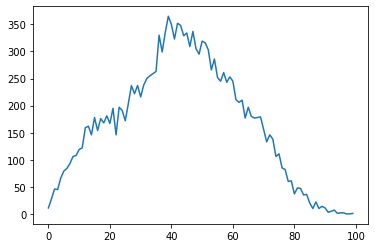

8 conv2d_9 (3, 3, 128, 128)


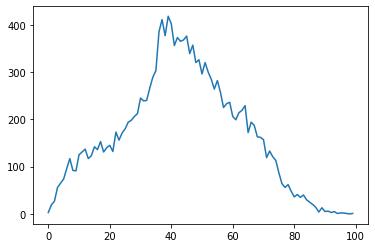

9 conv2d_10 (3, 3, 128, 128)


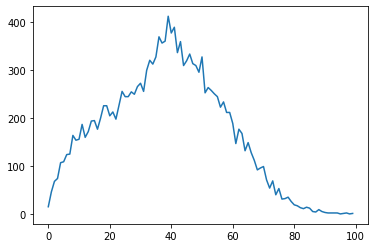

10 conv2d_12 (3, 3, 128, 256)


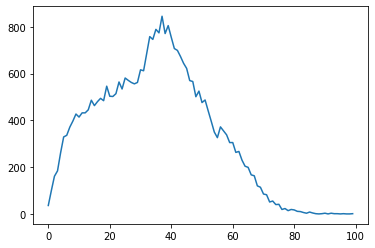

11 conv2d_13 (3, 3, 256, 256)


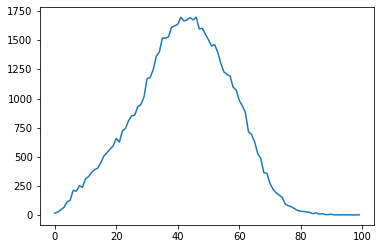

12 conv2d_14 (3, 3, 256, 256)


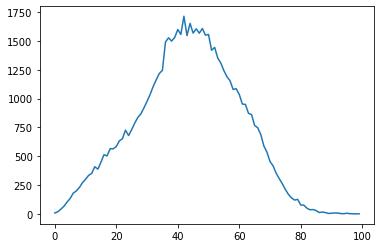

13 conv2d_15 (3, 3, 256, 256)


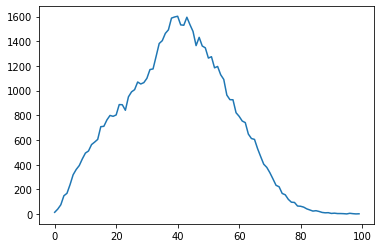

14 conv2d_17 (3, 3, 256, 512)


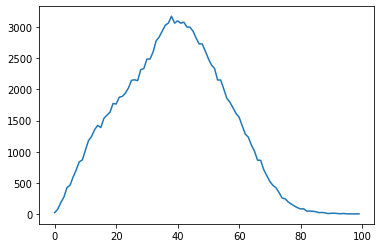

15 conv2d_18 (3, 3, 512, 512)


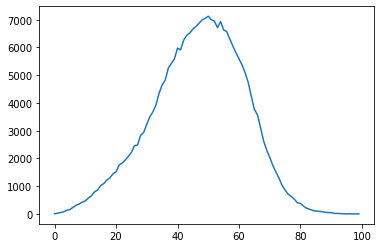

16 conv2d_19 (3, 3, 512, 512)


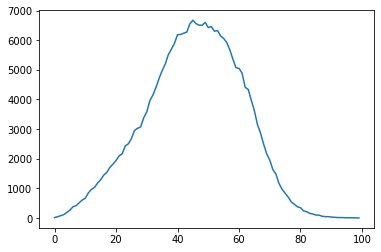

17 conv2d_20 (3, 3, 512, 512)


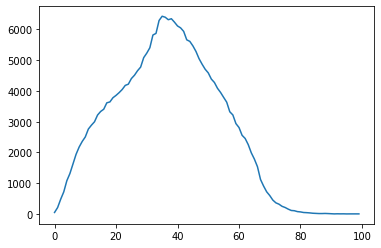

In [11]:
# Iterate over layers
plot_filt=0
n_pad=15
layer_counter=0
for layer in model.layers:
	  # check for convolutional layer
    if 'conv' in layer.name:
        # if filters are 3x3 or larger:
        if layer.kernel.shape[0]>=3 and layer.kernel.shape[1]>=3:
            layer_counter+=1
            list_f_response=np.zeros(layer.kernel.shape[-2]*layer.kernel.shape[-1])
            # summarize kernel shape
            print(layer_counter,layer.name,layer.kernel.shape)
            filter_counter=0
            # Iterate over every 3x3 filter in this layer
            for in_ch in range(layer.kernel.shape[-2]):
                for out_ch in range(layer.kernel.shape[-1]):
                    # pad and fft the filters
                    p_filter=layer.kernel[:,:,in_ch,out_ch]
                    filter_pad=np.pad(p_filter,pad_width=n_pad,mode='constant',constant_values=0)
                    filter_fft=np.fft.fftshift(np.abs(np.fft.fft2(filter_pad))**2)
                    filter_fft=filter_fft/np.sum(filter_fft)
                    # plot some fft examples
                    if filter_counter<plot_filt:
                        plt.imshow(filter_fft)
                        plt.colorbar()
                        plt.pause(1)
                    
                    # get x and y axis to quantify HP/LP structure
                    f_axis_0=np.arange(filter_fft.shape[0])
                    f_axis_0[f_axis_0>np.floor(filter_fft.shape[0]/2)]=np.flip(np.arange(np.floor(filter_fft.shape[0]/2))+1)
                    f_axis_0=np.fft.fftshift(f_axis_0)
                    f_axis_1=np.arange(filter_fft.shape[1])
                    f_axis_1[f_axis_1>np.floor(filter_fft.shape[1]/2)]=np.flip(np.arange(np.floor(filter_fft.shape[1]/2))+1)
                    f_axis_1=np.fft.fftshift(f_axis_1)

                    Y,X=np.meshgrid(f_axis_0,f_axis_1)
                    euc_dist=np.sqrt(X**2+Y**2)
                    mean_f_response=np.mean(euc_dist*filter_fft)
                    list_f_response[filter_counter]=mean_f_response

                    filter_counter+=1
            hist,bins=np.histogram(list_f_response,bins=100)
            plt.plot(hist)
            plt.savefig("fig"+layer.name+".png")
            plt.pause(1)